In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df = pd.read_csv('diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [58]:
df.isnull().any().any()

False

In [59]:

# Mapping for Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Mapping for Yes/No Data
binary_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush',
                  'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness',
                  'Alopecia', 'Obesity']

for column in binary_columns:
    df[column] = df[column].map({'No': 0, 'Yes': 1})

# Mapping for Positive/Negative Data
df['class'] = df['class'].map({'Negative': 0, 'Positive': 1})
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


<Axes: >

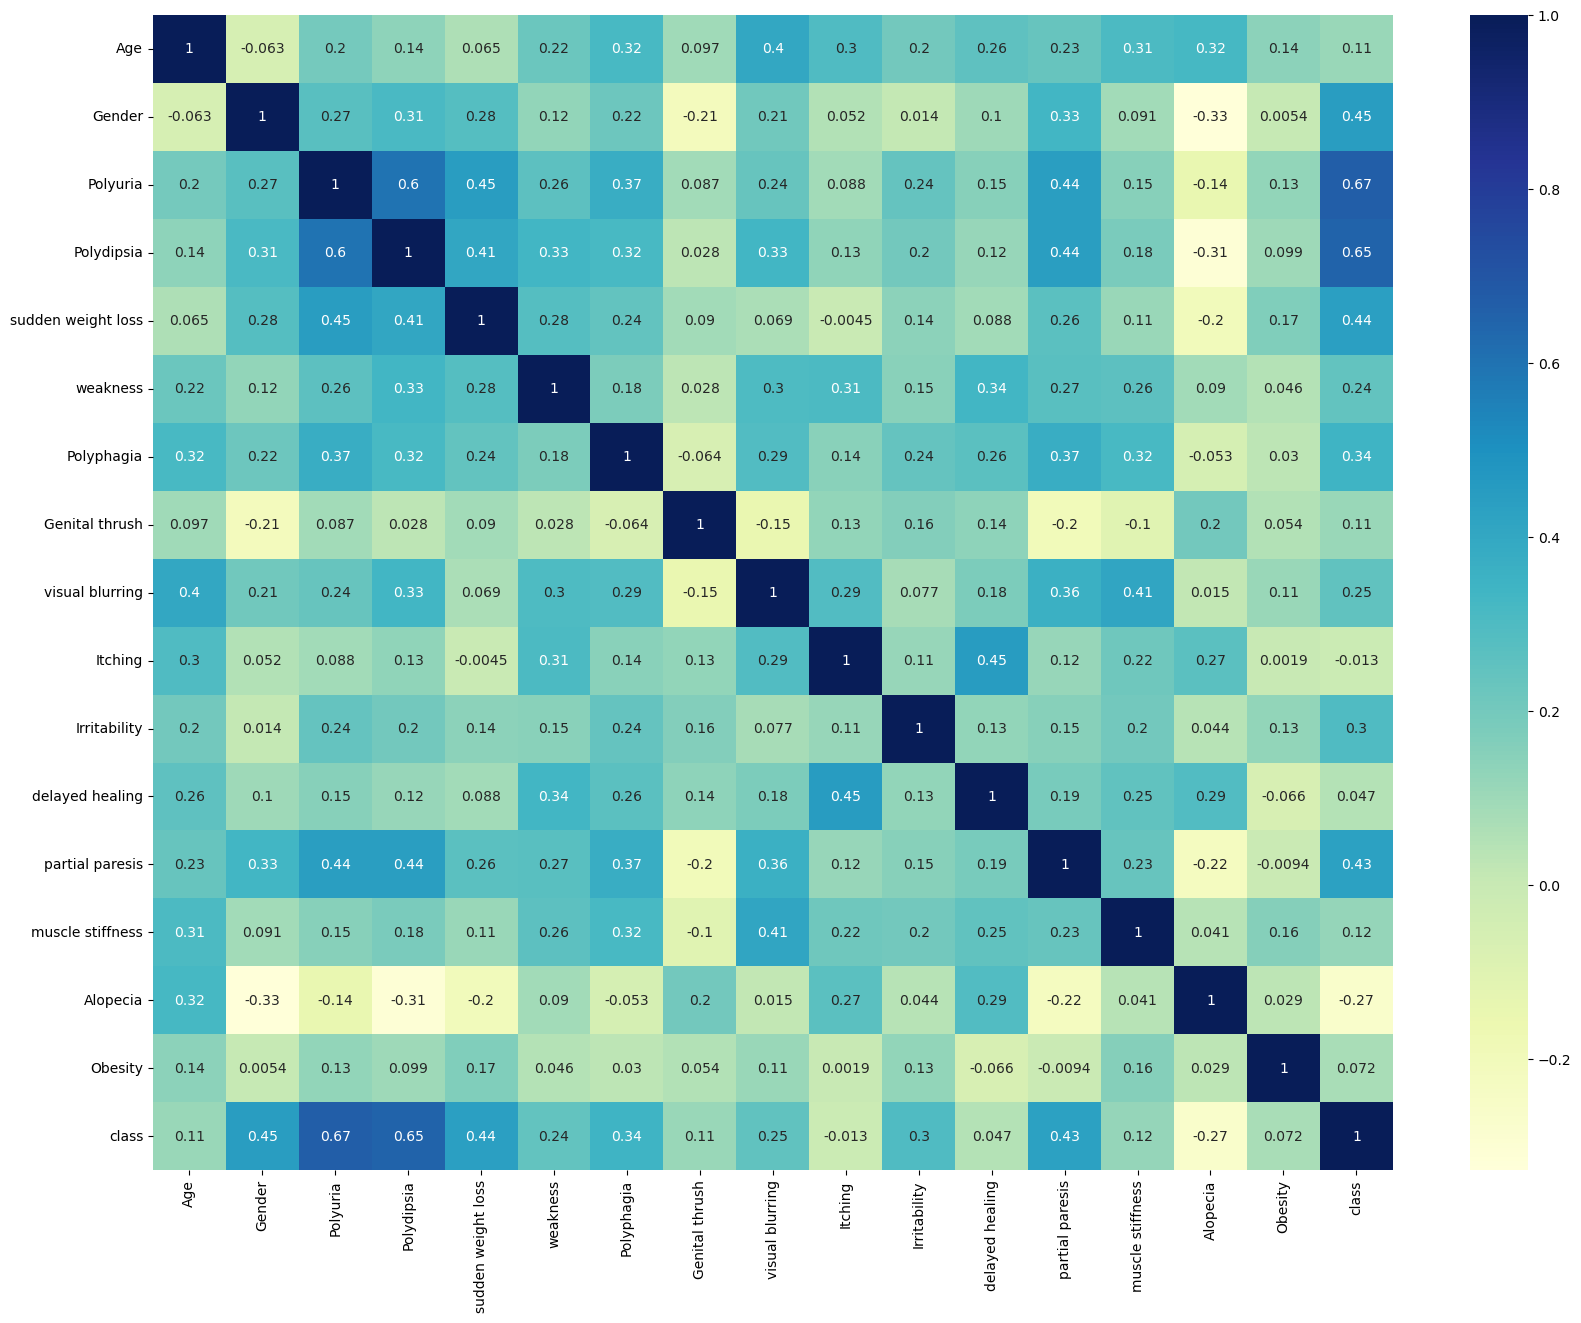

In [60]:

# Display the heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [61]:
correlation_with_class = df.corr()['class'].abs().sort_values(ascending=False)

print(correlation_with_class)

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
Gender                0.449233
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
Alopecia              0.267512
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching               0.013384
Name: class, dtype: float64


In [47]:
p_values = []
for column in df.drop(columns=['class']):
    feature_positive = df[df['class'] == 1][column]
    feature_negative = df[df['class'] == 0][column]
    _, p_value = ttest_ind(feature_positive, feature_negative)
    p_values.append((column, p_value))

# Select columns with p-value less than a significance level (e.g., 0.05)
significant_columns = [col for col, p_value in p_values if p_value < 0.05]

# Keep only the significant columns
df = df[['class'] + significant_columns]

print(df)

     class  Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0        1   40       0         0           1                   0         1   
1        1   58       0         0           0                   0         1   
2        1   41       0         1           0                   0         1   
3        1   45       0         0           0                   1         1   
4        1   60       0         1           1                   1         1   
..     ...  ...     ...       ...         ...                 ...       ...   
515      1   39       1         1           1                   1         0   
516      1   48       1         1           1                   1         1   
517      1   58       1         1           1                   1         1   
518      0   32       1         0           0                   0         1   
519      0   42       0         0           0                   0         0   

     Polyphagia  Genital thrush  visual blurring  I

In [62]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [63]:
x = df.drop(columns=['class'])  # Features (excluding the target variable)
y = df['class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08970271297753933


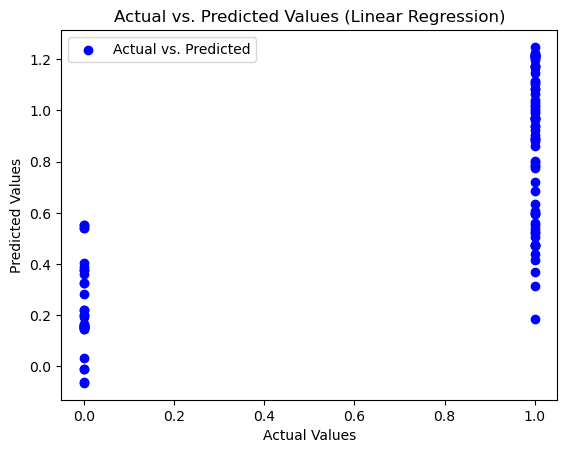

In [64]:
plt.scatter(y_test, y_pred, c='b', label='Actual vs. Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.legend(loc='upper left')
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error, accuracy_score

# Convert probabilities to binary predictions based on the threshold 0.5

y_pred = (y_pred >= 0.5).astype(int)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875
